# Test
## yum

this is a test cell


In [2]:
import sys
import os
from os.path import dirname
dir1 = os.getcwd()
dir2 = dirname(dirname(dir1))
sys.path.append(dir2)

In [41]:
import backtester
from backtester import Backtest
from datasets.periodic_stats.build import ROIStats
import numpy as np
import pandas as pd
from backtester.reporting.plots import barplot



# more test

In [47]:
import panel as pn
import panel.widgets as pnw
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import datetime as dt
pn.extension()
output_notebook()

Loading BokehJS ...

In [9]:
r = ROIStats(36)
data = r.read()
df = data.extract_column('sharpe')


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ACV,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1997-08-01,NaN,NaN,NaN,-0.224901,NaN,NaN,0.032683,0.059648,NaN,NaN,...,0.195365,0.040222,-0.185659,0.140739,NaN,NaN,NaN,0.100124,0.165120,NaN
1997-09-01,NaN,NaN,NaN,-0.187162,NaN,NaN,0.049861,0.088458,NaN,NaN,...,0.198755,0.026526,-0.116913,0.150430,NaN,NaN,NaN,0.120658,0.174100,NaN
1997-11-01,NaN,NaN,NaN,-0.208171,NaN,NaN,0.051408,0.131304,NaN,NaN,...,0.144601,-0.013396,-0.172799,0.132619,NaN,NaN,NaN,0.084416,0.174600,NaN
1998-01-01,NaN,NaN,NaN,-0.141648,NaN,NaN,-0.025577,0.088029,NaN,NaN,...,0.107324,-0.013688,-0.136303,0.201139,NaN,NaN,NaN,0.030873,0.253470,NaN
1998-05-01,NaN,NaN,NaN,-0.101069,NaN,NaN,-0.013935,0.088528,NaN,NaN,...,0.117370,0.019798,-0.082115,0.203126,NaN,NaN,NaN,0.009522,0.284610,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,0.173283,-0.211429,-0.073085,0.264926,0.071548,-0.092774,0.133010,0.164178,0.095010,0.125776,...,0.180366,-0.268595,-0.170988,-0.123486,0.107764,0.036265,-0.033127,0.266287,0.054180,0.303741
2021-01-01,0.139576,-0.144953,-0.069514,0.315042,0.034194,-0.049334,0.164613,0.232981,0.068165,0.148184,...,0.155114,-0.244471,-0.161128,-0.097911,0.075859,0.019920,-0.058093,0.337762,0.039020,0.247742
2021-03-01,0.149795,-0.084091,-0.074713,0.300982,0.043103,-0.086623,0.135170,0.218722,0.093020,0.154590,...,0.150757,-0.179166,-0.139774,-0.058979,0.082706,0.012091,-0.048137,0.397420,0.103293,0.243542
2021-04-01,0.133798,-0.101336,-0.050264,0.264417,0.020874,-0.064792,0.116089,0.153297,0.128211,0.104496,...,0.116350,-0.155740,-0.130386,-0.086556,0.070538,0.005019,-0.074109,0.370925,0.086637,0.216966


In [71]:
options = list(df.index.values)
slider = pnw.slider.DiscreteSlider(name='Desired Date', options=options,
                          value=options[-1],
                          )

In [90]:
def make_plot(date):
    series = df.loc[date]
    series.name = 'sharpe'
    df2 = pd.DataFrame(series)
    df2 = df2.sort_values(by='sharpe', ascending=False)
    df2 = df2.head(15)
    
    
    df2['stocks'] = df2.index
    
    return barplot(df2, x='sharpe', y='stocks')
    
    
gui = pn.bind(make_plot, slider,)
pn.Row(gui, slider)
    
    
    

Row
    [0] ParamFunction(function)
    [1] DiscreteSlider(name='Desired Date', options=[numpy.datetime64('1997-08...], value=numpy.datetime64('2003-09-...)

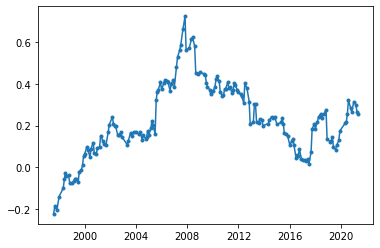

In [96]:
import matplotlib.pyplot as plt

plt.plot(df['AAPL'], '.-')
